In [1]:
#1)
import matplotlib.pyplot as plt
#from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from astropy.io import ascii
from astropy.table import Table

# LSST Science Pipeline packages (see pipelines.lsst.io)
import lsst.daf.base as dafBase
from lsst.daf.butler import Butler
import lsst.afw.image as afwImage
import lsst.afw.display as afwDisplay
import lsst.afw.table as afwTable
import lsst.geom as geom

# Pipeline tasks
from lsst.pipe.tasks.characterizeImage import CharacterizeImageTask
from lsst.meas.algorithms.detection import SourceDetectionTask
from lsst.meas.deblender import SourceDeblendTask
from lsst.meas.base import SingleFrameMeasurementTask
import lsst.daf.butler as dafButler





In [2]:

# For DP0.2, we want the following configuration and collection:
config = "dp02"
collection = '2.2i/runs/DP0.2'

butler = Butler(config=config, collections=collection)
registry = butler.registry

N_visits=192350


FileNotFoundError: Config location /home/v/vittorio/notebooks/my_notebooks/dp02 does not exist. (known aliases: /repo/tts, /repo/dc2_txn, /repo/hsc-temp, /repo/embargo_txn, /repo/embargo+sasquatch_dev, LSSTComCam, /repo/tts_txn, LATISS, /repo/ir2, /repo/main, LSSTCam, /repo/dc2+sasquatch_dev, /repo/ir2_txn, /repo/dc2, /repo/main+sasquatch_dev, /repo/oga, /repo/embargo, /repo/aos_imsim, /repo/main_txn)

In [ ]:
#OPZIONE MOLTO LENTA MA PIU' GENERICA, ora Skippa alla cella successiva 
#se invece la lista dei CCD c'e l'hai gia
scegli una visita (questa sappiamo avere molti CCD cosa che si puo' verificare )
N_visits=192350
datasetType = 'calexp'
dataId = {'visit': N_visits}
datasetRefs = set(registry.queryDatasets(datasetType, dataId=dataId))
point = geom.Point2D(2036, 2000)
e_all= []
ex_all= []
ey_all= []
Nccd=[]
for i, ref in enumerate(datasetRefs):
    calexp = butler.getDirect(ref)
    ccd=calexp.detector.getId()
    psf = calexp.getPsf()
    Ixx=psf.computeShape(point).getIxx()
    Iyy=psf.computeShape(point).getIyy()
    Ixy=psf.computeShape(point).getIxy()
    theta.append(np.arctan2(2. * Ixy, Ixx - Iyy) / 2.)
    e1 = (Ixx - Iyy) / (Ixx + Iyy)
    e2 = (2. * Ixy) / (Ixx + Iyy)
    e = np.sqrt(e1**2 + e2**2)
    ex = e * np.cos(theta)
    ey = e * np.sin(theta)
    e_all.append(e)
    ex_all.append(ex)
    ey_all.append(ey)
    Nccd.append(n_ccd)

print(e_all,Nccd)
    

In [47]:
# OPZIONE VELOCE:leggi da CCDvisita box la seconda colonna ccd
#e per ogni i definisci il detector e per quel detectori calcola data id e fai calecp e
#questa tabella serve anche per fare la mappa secondo me
table=ascii.read('CCDvisitabbox.csv',format='csv')
ccd=table['col3_1']

[0.006878794173783475, 0.0054190663762748795, 0.011904882042743599] [78, 141, 154]


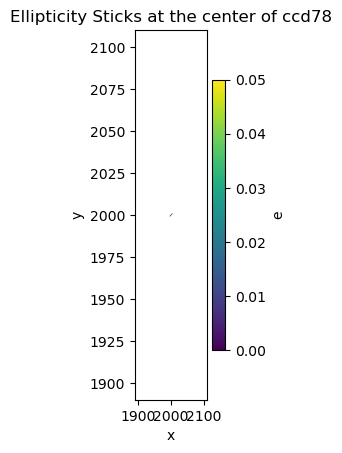

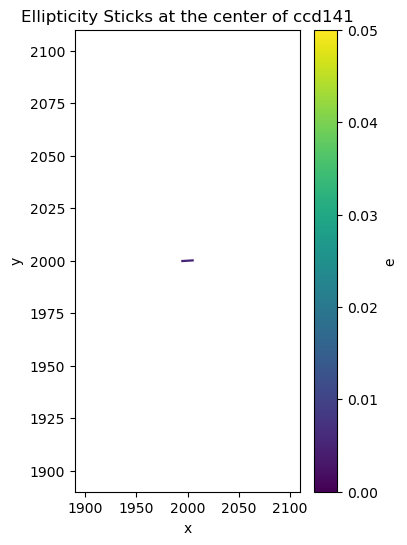

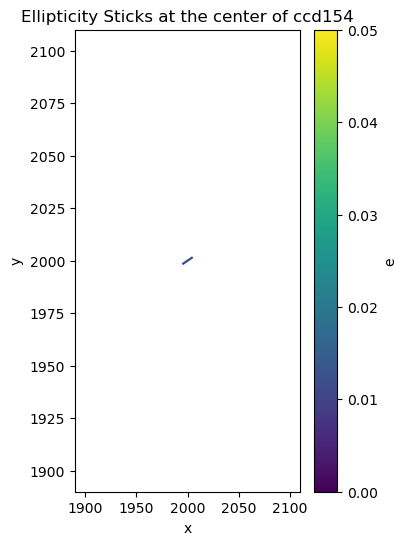

<Figure size 2000x600 with 0 Axes>

In [53]:
#questa cella calcola lo stick al centro di ognuno dei ccd partendo da una lista nota di CCD
point = geom.Point2D(2036, 2000)
e_all= []
ex_all= []
ey_all= []
Nccd=[]
 #theta= []
#for i in range(len(ccd)):
for i in range(3):
    n_ccd=ccd[i]
    dataId = {'visit': N_visits, 'detector': n_ccd}
    calexp = butler.get('calexp', **dataId)
    psf = calexp.getPsf()
    Ixx=psf.computeShape(point).getIxx()
    Iyy=psf.computeShape(point).getIyy()
    Ixy=psf.computeShape(point).getIxy()
    theta=np.arctan2(2. * Ixy, Ixx - Iyy) / 2.
    e1 = (Ixx - Iyy) / (Ixx + Iyy)
    e2 = (2. * Ixy) / (Ixx + Iyy)
    e = np.sqrt(e1**2 + e2**2)
    ex = e * np.cos(theta)
    ey = e * np.sin(theta)
    
    plt.subplots_adjust(wspace=0.5)
    plt.subplot(1, 4, 1)
    plt.quiver(2000, 2000, ex, ey, e, headlength=0., headwidth=1., pivot='mid', width=0.01)
    colorbar = plt.colorbar(label='e')
    plt.clim(0., 0.05)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Ellipticity Sticks at the center of ccd'+str(n_ccd))
    
    
    e_all.append(e)
    ex_all.append(ex)
    ey_all.append(ey)
    Nccd.append(n_ccd)
    plt.figure(figsize=(20, 6))

    
print(e_all,Nccd)


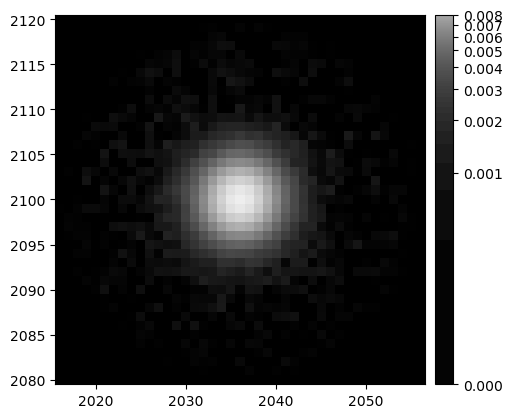

Add the Subtracted Sky Background Back into the Image

In [44]:
#Se invece vogliamo determinare la shape a partire dai momenti adattivi.
point = geom.Point2D(2036, 2000)
Ixx=psf.computeShape(point).getIxx()
Iyy=psf.computeShape(point).getIyy()
Ixy=psf.computeShape(point).getIxy()
theta = np.arctan2(2. * Ixy, Ixx - Iyy) / 2.
e1 = (Ixx - Iyy) / (Ixx + Iyy)
e2 = (2. * Ixy) / (Ixx + Iyy)
e = np.sqrt(e1**2 + e2**2)
ex = e * np.cos(theta)
ey = e * np.sin(theta)


Text(0.5, 1.0, 'Ellipticity Sticks')

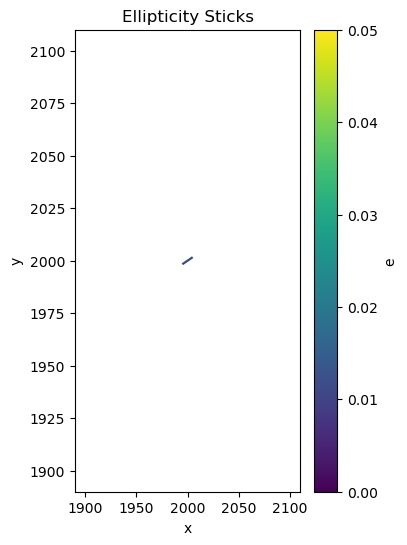

In [45]:
#Fare figura
plt.figure(figsize=(20, 6))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1, 4, 1)
plt.quiver(2000, 2000, ex, ey, e, headlength=0., headwidth=1., pivot='mid', width=0.01)
#plt.quiver(xx, yy, scale=e, angles=phi, headlength=0., headwidth=1., pivot='mid', width=0.005)
#colorbar = plt.colorbar(label='r$\sqrt(e1^{2} + e2^{2})$')
colorbar = plt.colorbar(label='e')
plt.clim(0., 0.05)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ellipticity Sticks')



In [21]:
#For visualization purposes, let's evaluate the PSF model at grid of points across the image
from lsst.geom import Point2D
n = 100
x_array = np.arange(0, calexp.getDimensions()[0], 200)
y_array = np.arange(0, calexp.getDimensions()[1], 200)
xx, yy = np.meshgrid(x_array, y_array)

print(calexp.getDimensions())

size = []
i_xx = []
i_yy = []
i_xy = []
for x, y in zip(xx.flatten(), yy.flatten()):
    point = Point2D(x, y)
    shape = psf.computeShape(point)
    size.append(shape.getTraceRadius())
    i_xx.append(shape.getIxx())
    i_yy.append(shape.getIyy())
    i_xy.append(shape.getIxy())
size = np.reshape(size, xx.shape)
i_xx = np.reshape(i_xx, xx.shape)
i_yy = np.reshape(i_yy, xx.shape)
i_xy = np.reshape(i_xy, xx.shape)

theta = np.arctan2(2. * i_xy, i_xx - i_yy) / 2.
e1 = (i_xx - i_yy) / (i_xx + i_yy)
e2 = (2. * i_xy) / (i_xx + i_yy)
theta_alternate = np.arctan2(e2, e1) / 2.
assert np.allclose(theta, theta_alternate)
e = np.sqrt(e1**2 + e2**2)
ex = e * np.cos(theta)
ey = e * np.sin(theta)

(4072, 4000)


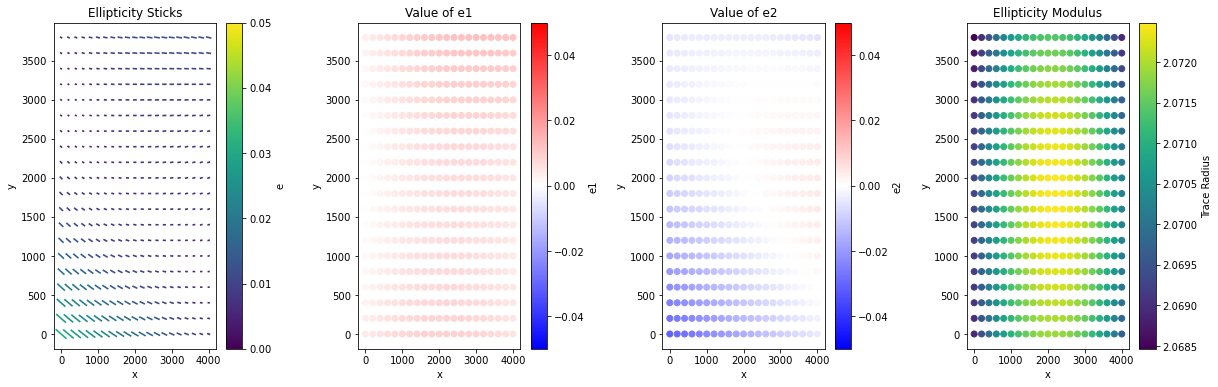

In [22]:
plt.figure(figsize=(20, 6))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 4, 1)
plt.quiver(xx, yy, ex, ey, e, headlength=0., headwidth=1., pivot='mid', width=0.01)
#plt.quiver(xx, yy, scale=e, angles=phi, headlength=0., headwidth=1., pivot='mid', width=0.005)
#colorbar = plt.colorbar(label='r$\sqrt(e1^{2} + e2^{2})$')
colorbar = plt.colorbar(label='e')
plt.clim(0., 0.05)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ellipticity Sticks')

plt.subplot(1, 4, 2)
plt.scatter(xx, yy, c=e1, vmin=-0.05, vmax=0.05, cmap='bwr')
colorbar = plt.colorbar(label='e1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Value of e1')

plt.subplot(1, 4, 3)
plt.scatter(xx, yy, c=e2, vmin=-0.05, vmax=0.05, cmap='bwr')
colorbar = plt.colorbar(label='e2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Value of e2')

plt.subplot(1, 4, 4)
plt.scatter(xx, yy, c=size)
colorbar = plt.colorbar(label='Trace Radius')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ellipticity Modulus');



In [11]:

#############################DOPO i consigli di josh

<bound method PyCapsule.getSchema of <lsst.afw.table.SourceColumnView object at 0x7f78aeb8aaf0>>

In [71]:
#more here
#https://github.com/LSSTScienceCollaborations/StackClub/blob/master/Validation/image_quality_demo.ipynb

In [15]:
# Columns for shape measurements
for name in src.schema.getOrderedNames():
    if 'shape' in name.lower():
        print(name)

base_Blendedness_flag_noShape
base_SdssShape_xx
base_SdssShape_yy
base_SdssShape_xy
base_SdssShape_xxErr
base_SdssShape_yyErr
base_SdssShape_xyErr
base_SdssShape_x
base_SdssShape_y
base_SdssShape_instFlux
base_SdssShape_instFluxErr
base_SdssShape_psf_xx
base_SdssShape_psf_yy
base_SdssShape_psf_xy
base_SdssShape_instFlux_xx_Cov
base_SdssShape_instFlux_yy_Cov
base_SdssShape_instFlux_xy_Cov
base_SdssShape_flag
base_SdssShape_flag_unweightedBad
base_SdssShape_flag_unweighted
base_SdssShape_flag_shift
base_SdssShape_flag_maxIter
base_SdssShape_flag_psf
ext_shapeHSM_HsmPsfMoments_x
ext_shapeHSM_HsmPsfMoments_y
ext_shapeHSM_HsmPsfMoments_xx
ext_shapeHSM_HsmPsfMoments_yy
ext_shapeHSM_HsmPsfMoments_xy
ext_shapeHSM_HsmPsfMoments_flag
ext_shapeHSM_HsmPsfMoments_flag_no_pixels
ext_shapeHSM_HsmPsfMoments_flag_not_contained
ext_shapeHSM_HsmPsfMoments_flag_parent_source
ext_shapeHSM_HsmPsfMoments_flag_galsim
ext_shapeHSM_HsmPsfMoments_flag_edge
ext_shapeHSM_HsmShapeRegauss_e1
ext_shapeHSM_HsmShapeReg

In [16]:
#The source catalogs include many measurements of source shapes and PSF model shapes
#

#Qui qualche confronto con le informazioni conntenute nel catalogo

src = butler.get('src', **dataId)
from lsst.geom import Point2D

# PSF shape at coordinates of first indexed souce
shape = psf.computeShape(Point2D(src['slot_Centroid_x'][0], src['slot_Centroid_y'][0])) 
print(shape.getIxx())
# Compare to catalog entry for PSF shape
print(src['slot_PsfShape_xx'][0])
# Units of the second moments
src.schema.find('base_SdssShape_psf_xx').getField().getUnits()
src.schema.find('slot_PsfShape_xx').getField().getUnits()

4.310387618383509
4.312260921134597


'pixel^2'

In [19]:
print(src['ext_shapeHSM_HsmSourceMoments_xx'][0])

8.11490908880609


In [ ]:
#qui le spiegazioni sono  diversi i  formalismi HSM
#base_SdssShape_xx/xy/yy = Adaptive moments in arcsec , SDSS algorithm
#
#base_SdssShape_psf_xx/xy/yy = Adaptive moments of PSF evaluated at object position in arcsec, SDSS algorithm
#
#
#ext_shapeHSM_HsmPsfMoments_xx/xy/yy = Adaptive moments of PSF evaluated at object position in arcsec, HSM algorithm
#
#ext_shapeHSM_HsmSourceMoments_xx/xy/yy = Adaptive moments in arcsec, not PSF-corrected , HSM algorithm
#
#ext_shapeHSM_HsmSourceMomentsRound_xx/xy/yy = ??

In [ ]:
#Columns for calibration measurements, 
#including indicators of the stars using for PSF modeling and held in reserve for testing the PSF model.

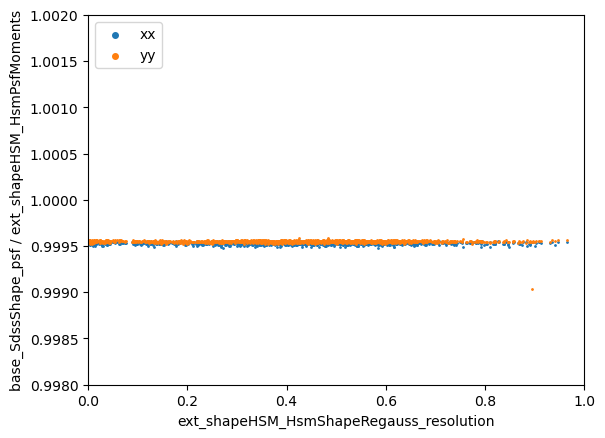

In [22]:
#now verify that the PSF models from SDSS and HSM algorithms are consistent by comparing adaptive moments of the PSF. 


#The plot also shows no trend in adaptive moments with respect to how well the source is resolved (i.e., source size), which is as expected since we are comparing PSF models as oppose to measurements for individual sources.
plt.figure()
plt.scatter(src['ext_shapeHSM_HsmShapeRegauss_resolution'], 
            src['base_SdssShape_psf_xx'] / src['ext_shapeHSM_HsmPsfMoments_xx'], s=1, label='xx')
plt.scatter(src['ext_shapeHSM_HsmShapeRegauss_resolution'], 
            src['base_SdssShape_psf_yy'] / src['ext_shapeHSM_HsmPsfMoments_yy'], s=1, label='yy')
plt.xlim(0., 1.)
plt.ylim(1. - 2.e-3, 1. + 2.e-3)
plt.legend(loc='upper left', markerscale=4)
plt.xlabel('ext_shapeHSM_HsmShapeRegauss_resolution')
plt.ylabel('base_SdssShape_psf / ext_shapeHSM_HsmPsfMoments');

#The plot below shows the ratio of adaptive moment sizes is very nearly unity. 


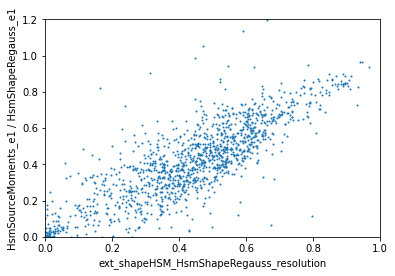

In [28]:
#To illustrate the difference between the PSF-corrected and non-PSF-corrected quantities within the HSM algorithm,
#now compare the ellipticity computed from the adaptive moments (not-PSF corrected) with the ellipticity including PSF-corrections
i_xx, i_yy, i_xy = src['ext_shapeHSM_HsmSourceMoments_xx'], src['ext_shapeHSM_HsmSourceMoments_yy'], src['ext_shapeHSM_HsmSourceMoments_xy']
e1_non_psf_corrected = (i_xx - i_yy) / (i_xx + i_yy)
ratio = e1_non_psf_corrected / src['ext_shapeHSM_HsmShapeRegauss_e1']
#trace_radius = np.sqrt((src['base_SdssShape_xx'] + src['base_SdssShape_yy']) / 2.)

plt.figure()
plt.scatter(src['ext_shapeHSM_HsmShapeRegauss_resolution'], ratio, s=1)
plt.xlim(0., 1.)
plt.ylim(0., 1.2)
plt.xlabel('ext_shapeHSM_HsmShapeRegauss_resolution')
plt.ylabel('HsmSourceMoments_e1 / HsmShapeRegauss_e1');
#In the plot below, we see a clear trend with the amount of source resolution. 
#For sources that are increasingly resolved, the PSF-corrected and non-PSF-corrected ellipticities converge. 
#For sources that are not well resolved, the PSF-corrected and non-PSF-corrected ellipticities diverge.


In [ ]:
#Guardare anche qui invece se uno vuole le psf usate  coadd 
#https://github.com/rubin-dp0/tutorial-notebooks/blob/main/03c_Survey_Property_Maps.ipynb
#oppure guardare la fine del notebook 
#https://github.com/LSSTScienceCollaborations/StackClub/blob/master/Validation/image_quality_demo.ipynb

In [14]:
#More about Detection and deblending


In [73]:
#Recall that these tasks were imported up at the top of this notebook, from lsst.pipe and lsst.meas(https://pipelines.lsst.io/)

In [48]:
#We start by creating a minimal schema for the source table.
#The schema describes the output properties that will be measured for each source. 
#This schema will be passed to all of the tasks, as we call each in turn,
#and each task will add columns to this schema as it measures sources in the image.
# Create a basic schema to use with these tasks
schema = afwTable.SourceTable.makeMinimalSchema()
print(schema)

# Create a container which will be used to record metadata
#  about algorithm execution
algMetadata = dafBase.PropertyList()
print('algMetadata: ')
algMetadata


Schema(
    (Field['L'](name="id", doc="unique ID"), Key<L>(offset=0, nElements=1)),
    (Field['Angle'](name="coord_ra", doc="position in ra/dec"), Key<Angle>(offset=8, nElements=1)),
    (Field['Angle'](name="coord_dec", doc="position in ra/dec"), Key<Angle>(offset=16, nElements=1)),
    (Field['L'](name="parent", doc="unique ID of parent source"), Key<L>(offset=24, nElements=1)),
)

algMetadata: 


In [49]:
#Inniziamo con il configurare il task per la detection, e anche gli altri visto che ci troviamo
# Detect sources
config = SourceDetectionTask.ConfigClass()
# detection threshold in units of thresholdType
config.thresholdValue = 10
# units for thresholdValue
config.thresholdType = "stdev"
sourceDetectionTask = SourceDetectionTask(schema=schema, config=config)


# Deblend sources
sourceDeblendTask = SourceDeblendTask(schema=schema)

# Measure source properties
config = SingleFrameMeasurementTask.ConfigClass()
sourceMeasurementTask = SingleFrameMeasurementTask(schema=schema,
                                                   config=config,
                             algMetadata=algMetadata)

In [79]:
#per esplorarlo
#help(SourceDetectionTask)

Help on class SourceDetectionTask in module lsst.meas.algorithms.detection:

class SourceDetectionTask(lsst.pipe.base.task.Task)
 |  SourceDetectionTask(schema=None, **kwds)
 |  
 |  Create the detection task.  Most arguments are simply passed onto pipe.base.Task.
 |  
 |  Parameters
 |  ----------
 |  schema : `lsst.afw.table.Schema`
 |      Schema object used to create the output `lsst.afw.table.SourceCatalog`
 |  **kwds
 |      Keyword arguments passed to `lsst.pipe.base.task.Task.__init__`
 |  
 |  If schema is not None and configured for 'both' detections,
 |  a 'flags.negative' field will be added to label detections made with a
 |  negative threshold.
 |  
 |  Notes
 |  -----
 |  This task can add fields to the schema, so any code calling this task must ensure that
 |  these columns are indeed present in the input match list.
 |  
 |  Method resolution order:
 |      SourceDetectionTask
 |      lsst.pipe.base.task.Task
 |      builtins.object
 |  
 |  Methods defined here:
 |  


In [ ]:
#First we create SourceTable for holding the output of our source analysis.
#The columns and characteristics of this table are defined by the schema that we created in our configuration step.

In [50]:
tab = afwTable.SourceTable.make(schema)

In [51]:
# Source detection (this cell may take a few seconds)
result = sourceDetectionTask.run(tab, calexp)
type(result)


lsst.pipe.base.struct.Struct

In [64]:
#940 sorgenti usando 10 sigma se invece 
config.thresholdValue = 3
result = sourceDetectionTask.run(tab, calexp)
type(result)

AttributeError: lsst.meas.base.sfm.SingleFrameMeasurementConfig has no attribute thresholdValue

In [52]:
#The source detection task returns an lsst.pipe.base.struct.Struct che puo' essere esplorato con il getDict:
for k, v in result.getDict().items():
    print(k, type(v))


positive <class 'lsst.afw.detection.FootprintSet'>
negative <class 'NoneType'>
factor <class 'float'>
positiveThreshold <class 'lsst.afw.detection.Threshold'>
negativeThreshold <class 'lsst.afw.detection.Threshold'>
background <class 'lsst.afw.math._backgroundList.BackgroundList'>
numPos <class 'int'>
numPosPeaks <class 'int'>
numNeg <class 'int'>
numNegPeaks <class 'int'>
fpSets <class 'lsst.pipe.base.struct.Struct'>
sources <class 'lsst.afw.table.SourceCatalog'>


In [57]:
result.numPosPeaks
sources=result.sources
sources



<class 'lsst.afw.table.SourceCatalog'>
 id coord_ra coord_dec ... base_Variance_value base_Variance_flag_emptyFootprint
      rad       rad    ...                                                      
--- -------- --------- ... ------------------- ---------------------------------
  1      nan       nan ...                 nan                             False
  2      nan       nan ...                 nan                             False
  3      nan       nan ...                 nan                             False
  4      nan       nan ...                 nan                             False
  5      nan       nan ...                 nan                             False
  6      nan       nan ...                 nan                             False
  7      nan       nan ...                 nan                             False
  8      nan       nan ...                 nan                             False
  9      nan       nan ...                 nan                        

In [58]:
#Next we run the SourceDeblendTask and SingleFrameMeasurementTask. 

# Source deblending
#e mando
sourceDeblendTask.run(calexp, sources)

# Source measurement
sourceMeasurementTask.run(measCat=sources, exposure=calexp)


In [59]:

# The copy makes sure that the sources are sequential in memory
sources = sources.copy(True)

# Investigate the output source catalog
sources.asAstropy()


id,coord_ra,coord_dec,parent,deblend_nChild,deblend_deblendedAsPsf,deblend_psfCenter_x,deblend_psfCenter_y,deblend_psf_instFlux,deblend_tooManyPeaks,deblend_parentTooBig,deblend_masked,deblend_skipped,deblend_rampedTemplate,deblend_patchedTemplate,deblend_hasStrayFlux,deblend_peak_center_x,deblend_peak_center_y,deblend_peakId,deblend_nPeaks,deblend_parentNPeaks,base_NaiveCentroid_x,base_NaiveCentroid_y,base_NaiveCentroid_flag,base_NaiveCentroid_flag_noCounts,base_NaiveCentroid_flag_edge,base_NaiveCentroid_flag_resetToPeak,base_SdssCentroid_x,slot_Centroid_x,base_SdssCentroid_y,slot_Centroid_y,base_SdssCentroid_xErr,slot_Centroid_xErr,base_SdssCentroid_yErr,slot_Centroid_yErr,base_SdssCentroid_flag,base_CircularApertureFlux_flag_badCentroid,base_GaussianFlux_flag_badCentroid,base_LocalBackground_flag_badCentroid,base_NaiveCentroid_flag_badInitialCentroid,base_PsfFlux_flag_badCentroid,base_SdssShape_flag_badCentroid,base_Variance_flag_badCentroid,slot_Centroid_flag,base_SdssCentroid_flag_edge,base_CircularApertureFlux_flag_badCentroid_edge,base_GaussianFlux_flag_badCentroid_edge,base_LocalBackground_flag_badCentroid_edge,base_NaiveCentroid_flag_badInitialCentroid_edge,base_PsfFlux_flag_badCentroid_edge,base_SdssShape_flag_badCentroid_edge,base_Variance_flag_badCentroid_edge,slot_Centroid_flag_edge,base_SdssCentroid_flag_noSecondDerivative,base_CircularApertureFlux_flag_badCentroid_noSecondDerivative,base_GaussianFlux_flag_badCentroid_noSecondDerivative,base_LocalBackground_flag_badCentroid_noSecondDerivative,base_NaiveCentroid_flag_badInitialCentroid_noSecondDerivative,base_PsfFlux_flag_badCentroid_noSecondDerivative,base_SdssShape_flag_badCentroid_noSecondDerivative,base_Variance_flag_badCentroid_noSecondDerivative,slot_Centroid_flag_noSecondDerivative,base_SdssCentroid_flag_almostNoSecondDerivative,base_CircularApertureFlux_flag_badCentroid_almostNoSecondDerivative,base_GaussianFlux_flag_badCentroid_almostNoSecondDerivative,base_LocalBackground_flag_badCentroid_almostNoSecondDerivative,base_NaiveCentroid_flag_badInitialCentroid_almostNoSecondDerivative,base_PsfFlux_flag_badCentroid_almostNoSecondDerivative,base_SdssShape_flag_badCentroid_almostNoSecondDerivative,base_Variance_flag_badCentroid_almostNoSecondDerivative,slot_Centroid_flag_almostNoSecondDerivative,base_SdssCentroid_flag_notAtMaximum,base_CircularApertureFlux_flag_badCentroid_notAtMaximum,base_GaussianFlux_flag_badCentroid_notAtMaximum,base_LocalBackground_flag_badCentroid_notAtMaximum,base_NaiveCentroid_flag_badInitialCentroid_notAtMaximum,base_PsfFlux_flag_badCentroid_notAtMaximum,base_SdssShape_flag_badCentroid_notAtMaximum,base_Variance_flag_badCentroid_notAtMaximum,slot_Centroid_flag_notAtMaximum,base_SdssCentroid_flag_resetToPeak,base_CircularApertureFlux_flag_badCentroid_resetToPeak,base_GaussianFlux_flag_badCentroid_resetToPeak,base_LocalBackground_flag_badCentroid_resetToPeak,base_NaiveCentroid_flag_badInitialCentroid_resetToPeak,base_PsfFlux_flag_badCentroid_resetToPeak,base_SdssShape_flag_badCentroid_resetToPeak,base_Variance_flag_badCentroid_resetToPeak,slot_Centroid_flag_resetToPeak,base_SdssCentroid_flag_badError,base_CircularApertureFlux_flag_badCentroid_badError,base_GaussianFlux_flag_badCentroid_badError,base_LocalBackground_flag_badCentroid_badError,base_NaiveCentroid_flag_badInitialCentroid_badError,base_PsfFlux_flag_badCentroid_badError,base_SdssShape_flag_badCentroid_badError,base_Variance_flag_badCentroid_badError,slot_Centroid_flag_badError,base_Blendedness_old,base_Blendedness_raw,base_Blendedness_raw_child_instFlux,base_Blendedness_raw_parent_instFlux,base_Blendedness_abs,base_Blendedness_abs_child_instFlux,base_Blendedness_abs_parent_instFlux,base_Blendedness_raw_child_xx,base_Blendedness_raw_child_yy,base_Blendedness_raw_child_xy,base_Blendedness_raw_parent_xx,base_Blendedness_raw_parent_yy,base_Blendedness_raw_parent_xy,base_Blendedness_abs_child_xx,base_Blendedness_abs_child_yy,base_Blendedness_abs_child_xy,base_Blendedness_abs_parent_x

In [60]:
# Overplot Sources on Image
# Define a small region for a cutout
bbox = geom.Box2I()
bbox.include(geom.Point2I(xmin, ymin))
bbox.include(geom.Point2I(xmin + width, ymin + height))

# An alternative way to defined the same cutout region
# bbox = geom.Box2I(geom.Point2I(xmin, ymin), geom.Extent2I(width, height))

# Generate the cutout image
cutout = calexp.Factory(calexp, bbox, origin=afwImage.LOCAL, deep=False)

<Figure size 432x288 with 0 Axes>

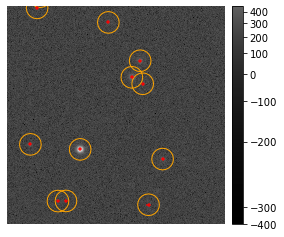

In [61]:
# Display the cutout and sources with afw display
image = cutout.image
plt.figure()
afw_display = afwDisplay.Display()
afw_display.scale('asinh', 'zscale')
afw_display.mtv(image)
plt.gca().axis('off')

# We use display buffering to avoid re-drawing the image
#  after each source is plotted
with afw_display.Buffering():
    for s in sources:
        afw_display.dot('+', s.getX(), s.getY(), ctype=afwDisplay.RED)
        afw_display.dot('o', s.getX(), s.getY(), size=20, ctype='orange')

In [65]:
# Grab the above-threshold footprints that were detected,
#  and assign them to the variable `fps`
fpset = result.positive
fps = fpset.getFootprints()

In [66]:
# We can get a rough view of the first source's footprint from its span
fps[0].getSpans()


[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1